In [41]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

import numpy as np

In [42]:
data = pd.read_csv('Datasets/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
x = data.iloc[:,1:-3].values
y = data['Species']

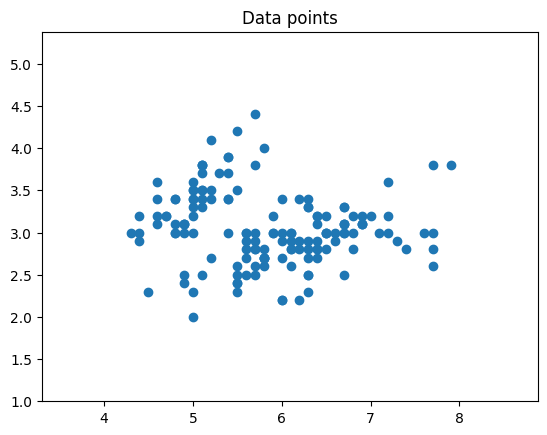

In [44]:
h = .02

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.figure()
plt.scatter(x[:,0], x[:,1])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Data points")
plt.show()

In [45]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [46]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25, random_state=12)

In [47]:
model = KNeighborsClassifier()
model.fit(x, y)

KNeighborsClassifier()

In [48]:
z = model.predict(np.c_[xx.ravel(), yy.ravel()])

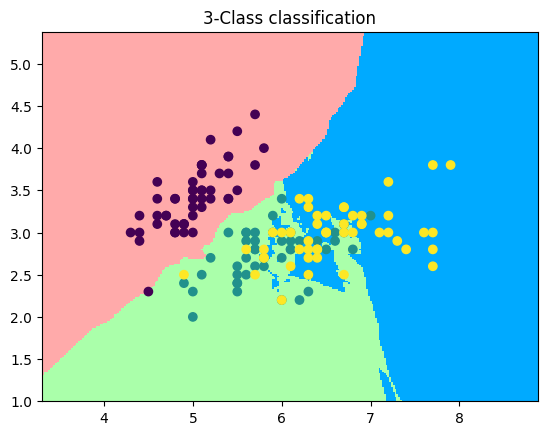

In [50]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

z = z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, z, cmap=cmap_light)

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification")
plt.show()